1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson
import pandas as pd


%matplotlib inline

In [1]:
from scipy.stats import poisson

probab = 1-poisson.cdf(k=15., mu=6.3)

print("Probability that in a single year are observed 15 or more hurricances : {}".format(probab))


Probability that in a single year are observed 15 or more hurricances : 0.0008444930803583883


Probability that in a single year are observed 15 or more hurricances : 0.0008444930803583883
Z = 2.9


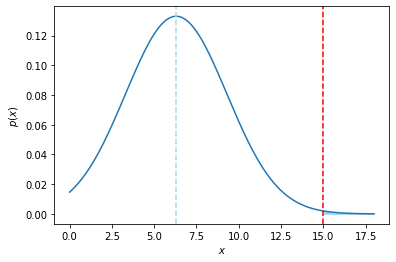

In [2]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


from scipy.stats import poisson

probab = 1-poisson.cdf(k=15., mu=6.3)

print("Probability that in a single year are observed 15 or more hurricances : {}".format(probab))

x0 = 15.
mu = 6.3
sigma = 3.

# determine the Z score
Z = abs(x0 - mu) / sigma
print("Z =", Z)

# plot the measurement and its assumed pdf
w = 15-mu 
x = np.linspace(0, 18, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y)
plt.fill_between(x, y, where=x >= 15, color='lightblue')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T value:  -3.786997938137629


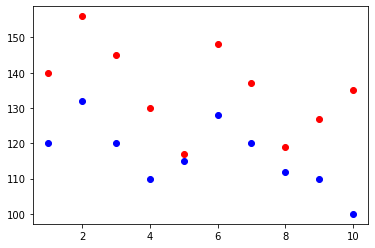

p-value = 0.004302464132864604
Since the p-value 0.004 is  < 𝛼/2(0.05) , we don't accept the null hypothesis.


In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
#mean
pre_mean = np.mean(pre)
post_mean = np.mean(post)
#N size of datasets
n = len(pre)

#variance
sigma_pre = np.sqrt(np.var(pre, ddof=1))
sigma_post = np.sqrt(np.var(post, ddof=1))
sigma = np.sqrt((sigma_pre**2 + sigma_post**2)/2)

T = (pre_mean - post_mean) / (sigma * np.sqrt(2/n))
print("T value: ",T)

plt.figure()
plt.plot(range(1,11), pre, 'bo')
plt.plot(range(1,11), post, 'ro')
plt.show()

pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

#Since the p-value 0.004 is  <𝛼/2 , we don't accept the null hypothesis.
print("Since the p-value 0.004 is  < 𝛼/2(0.05) , we don't accept the null hypothesis.")

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Text(0, 0.5, 'Min and max temperature')

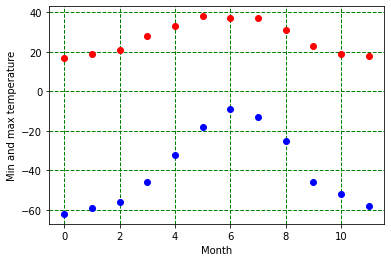

In [4]:
import numpy as np

temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

#plot
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [5]:
from scipy import optimize

#cos f(t) = a \cos(2\pi t + b)+c$$
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
                                      
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

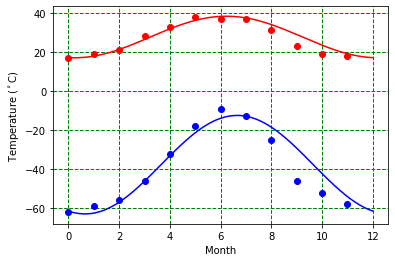

In [6]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [9]:
munich_data = pd.read_csv('/content/munich_temperatures_average_with_bad_data.txt',sep=" ", header=None)
munich_data

,0,1
0,1995.00274,0.944444
1,1995.00548,-1.611110
2,1995.00821,-3.555560
3,1995.01095,-9.833330
4,1995.01369,-10.222200
...,...,...
6674,2013.27379,7.333330
6675,2013.27652,10.000000
6676,2013.27926,10.555600
6677,2013.28200,8.944440


<ipython-input-15-dc90a6a2e07a>:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  mun_data_filtered = mun_data_filtered[mun_data_filtered[0].between(2008, 2012, inclusive=False)]  #filtering by year
<ipython-input-15-dc90a6a2e07a>:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  mun_data_filtered = mun_data_filtered[mun_data_filtered[1].between(-50, 50, inclusive=False)]  #cleaning noise on temperature


Text(0, 0.5, 'Min and max temperature')

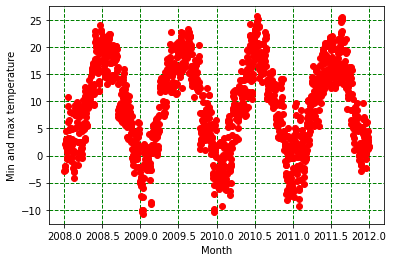

In [15]:
mun_data_filtered = munich_data


#cleaned data by filtering some of the values because it was noisy.

mun_data_filtered = mun_data_filtered[mun_data_filtered[0].between(2008, 2012, inclusive=False)]  #filtering by year
mun_data_filtered = mun_data_filtered[mun_data_filtered[1].between(-50, 50, inclusive=False)]  #cleaning noise on temperature



mun_temp = np.array(mun_data_filtered[1])
mun_years = np.array(mun_data_filtered[0])


#plot
years = np.arange(2014-1995)
plt.plot(mun_years, mun_temp, 'ro')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [16]:
def f_mun(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times) * 2 * np.pi)+time_offset)

In [17]:
res_max, cov_max = optimize.curve_fit(f_mun, mun_years,
                                      mun_temp, [-20, 30, 0])

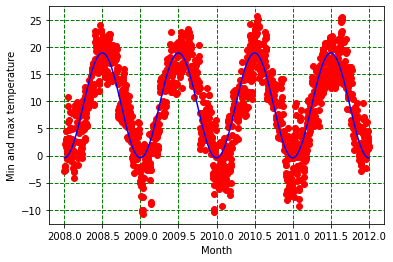

In [18]:
#f
plt.plot(mun_years, mun_temp, 'ro')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
plt.plot(mun_years, f_mun(mun_years, *res_max), 'b-')

In [20]:
#g
def g_mun(t, a, b, c,d):
    return (d+ a * np.cos(t*(b) * 2 * np.pi+c))

In [21]:
res_max, cov_max = optimize.curve_fit(g_mun, mun_years,
                                      mun_temp, [-20, 30, 0, 0])

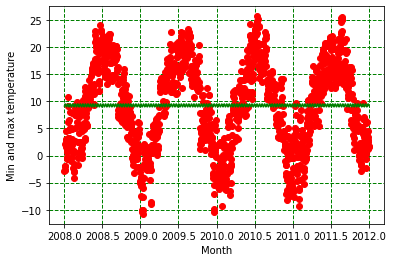

In [22]:
plt.plot(mun_years, mun_temp, 'ro')
plt.grid(color='g', linestyle='--', linewidth=1)
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
#plt.plot(mun_years, f_mun(mun_years, *res_max), 'b-')
plt.plot(mun_years, g_mun(mun_years, *res_max), 'g-')